In [3]:
from google.colab import files
files.upload()

Saving data.csv to data.csv


{'data.csv': b'X1,X2,Y\r\n78,80,1\r\n91,43,0\r\n76,75,0\r\n45,28,0\r\n73,1,0\r\n62,83,1\r\n84,94,1\r\n84,77,0\r\n77,90,1\r\n37,0,0\r\n48,37,0\r\n88,3,0\r\n87,77,0\r\n76,17,0\r\n29,52,1\r\n18,38,1\r\n86,31,0\r\n4,34,1\r\n8,24,1\r\n84,73,0\r\n51,100,1\r\n90,78,0\r\n88,51,0\r\n24,52,1\r\n99,69,0\r\n60,63,1\r\n69,17,0\r\n84,28,0\r\n26,34,1\r\n54,88,1\r\n87,79,0\r\n1,37,1\r\n75,60,0\r\n99,94,0\r\n88,82,0\r\n39,47,1\r\n32,47,1\r\n0,22,1\r\n100,21,0\r\n3,64,1\r\n31,2,0\r\n8,42,1\r\n83,34,0\r\n6,95,1\r\n15,24,1\r\n94,36,0\r\n85,11,0\r\n6,48,1\r\n43,44,1\r\n'}

In [4]:
import pandas as pd
df=pd.read_csv('data.csv')
df

,X1,X2,Y
0,78,80,1
1,91,43,0
2,76,75,0
3,45,28,0
4,73,1,0
5,62,83,1
6,84,94,1
7,84,77,0
8,77,90,1
9,37,0,0


In [5]:
X1=df['X1'].values.tolist()
X2=df['X2'].values.tolist()
Y=df['Y'].values.tolist()
print(X1)
print(X2)
print(Y)

[78, 91, 76, 45, 73, 62, 84, 84, 77, 37, 48, 88, 87, 76, 29, 18, 86, 4, 8, 84, 51, 90, 88, 24, 99, 60, 69, 84, 26, 54, 87, 1, 75, 99, 88, 39, 32, 0, 100, 3, 31, 8, 83, 6, 15, 94, 85, 6, 43]
[80, 43, 75, 28, 1, 83, 94, 77, 90, 0, 37, 3, 77, 17, 52, 38, 31, 34, 24, 73, 100, 78, 51, 52, 69, 63, 17, 28, 34, 88, 79, 37, 60, 94, 82, 47, 47, 22, 21, 64, 2, 42, 34, 95, 24, 36, 11, 48, 44]
[1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1]


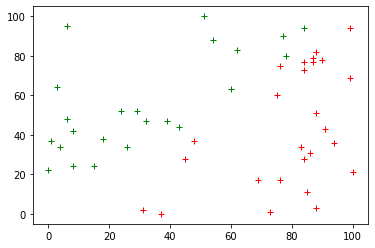

In [6]:
import matplotlib.pyplot as plt
import math
import random
from IPython import display
from scipy.signal import savgol_filter
plt.figure()
for i in range(len(Y)):
    if Y[i]==0:
        plt.plot(X1[i],X2[i], "r+")
    else:
        plt.plot(X1[i],X2[i],"g+")
plt.show()

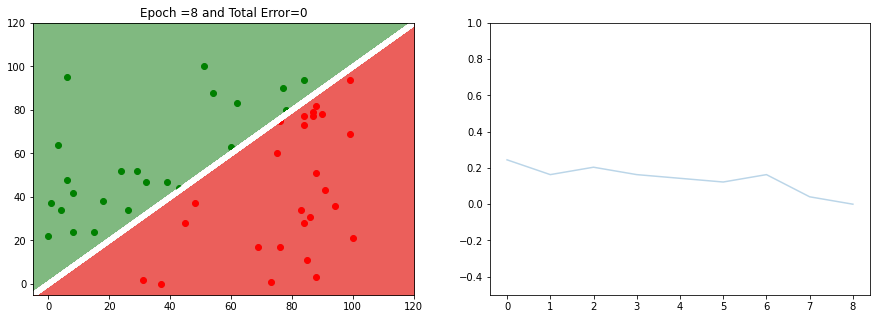

Epoch: 8 Loss: 0.0 and y=[-5.0068256229744, 119.81997577075225] and x=0.013772650456244298


In [7]:
W=[random.random(), random.random()]
b=random.random()
lr=0.5

theta=0.5
epoch=0
count=0
loss=[]
while count < len(X1):
    total_error=0
    for i in range(len(X1)):
        ws=W[0]*X1[i]+W[1]*X2[i]+b
        pred=0
        if ws > theta:
            pred=1
        
        error = Y[i]-pred
        if error!=0:
            count=0
            total_error+=math.sqrt(error**2)
            W[0]+=lr*error*X1[i]
            W[1]+=lr*error*X2[i]
            b+=lr*error
        else:
            count+=1
    loss.append(1/len(X1)*total_error)
    plt.figure(figsize=(15,5))
    
    display.clear_output(wait=True)
    plt.subplot(1,2,1)
    for i in range(len(Y)):
        if Y[i]==0:
            plt.plot(X1[i],X2[i], "ro")
        else:
            plt.plot(X1[i],X2[i],"go")
        plt.xlim(-5,120)
        plt.ylim(-5,120)
        xint=(theta-b)/W[0]
        yint=(theta-b)/W[1]
        slope=-yint/xint
        x=plt.xlim()
        y=[]
        for i in x:
            y.append(slope*i+yint)
        plt.plot(x,y, 'w-',linewidth=5)
        plt.fill_between(x=[-5,120],y1=-5,y2=120, color='g',alpha=.01)
        plt.fill_between(x=[-5,120],y1=-5,y2=y, color='#F05F5F',alpha=.4)
        #plt.fill_between(x=[-5,120],y1=y,y2=-5, color='g')
        
    plt.title(f"Epoch ={epoch} and Total Error={total_error}")
    plt.subplot(1,2,2)
    plt.ylim([-.5,1])
    plt.plot(loss, alpha=0.3)
    if epoch > 10:
        avg = savgol_filter(loss, 11, 3) # window size 51, polynomial order 3
        plt.plot(avg, 'r--', lw=3)
    
    plt.show()
    print(f"Epoch: {epoch} Loss: {loss[-1]} and y={y} and x={xint}")
    epoch+=1